In [2]:
import seaborn as sns
import statsmodels.tsa.stattools as ts
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR

from compounds_research.compound.utils import make_rates_df
from compounds_research import utils


In [4]:
df_total_supply = make_rates_df('total_supply_history', 'D').dropna()

In [13]:
df_total_supply.median()

cbat     2.169240e+08
cdai     1.076828e+09
ceth     1.782519e+07
crep     5.434994e+07
csai     1.030414e+08
cusdc    1.567129e+09
cwbtc    7.789863e+03
czrx     2.582790e+08
dtype: float32

In [12]:
df_borrow = make_rates_df('borrow_rates', 'D').dropna()
df_supply = make_rates_df('supply_rates', 'D').dropna()

# Normalize rates by first value
df_borrow_norm = df_borrow.divide(df_borrow.iloc[0])
df_supply_norm = df_supply.divide(df_supply.iloc[0])


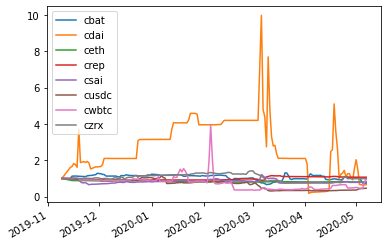

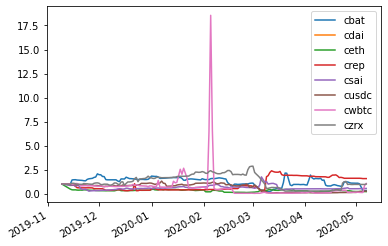

In [13]:
df_borrow_norm.plot()
df_supply_norm.plot()

In [41]:
#Testing for cointegration (supply)
for i in df_supply.columns:
    for j in df_supply.columns:
        if i != j:
            test_result = ts.coint(df_supply[i], df_supply[j])
            print(i + ' and ' + j + ': p-value = ' + str(test_result[1]))
#--> Suggests that ceth and cwbtc tend to be cointegrated with other series

cbat and cdai: p-value = 0.8978440414704812
cbat and ceth: p-value = 0.2295925841444662
cbat and crep: p-value = 0.041759109918903754
cbat and csai: p-value = 0.9343894811899266
cbat and cusdc: p-value = 0.04932066831327338
cbat and cwbtc: p-value = 0.18214385365782648
cbat and czrx: p-value = 0.23240334778449628
cdai and cbat: p-value = 0.8713501263325667
cdai and ceth: p-value = 0.7948236360635205
cdai and crep: p-value = 0.5335354525376719
cdai and csai: p-value = 0.21071688397557564
cdai and cusdc: p-value = 0.379015563008011
cdai and cwbtc: p-value = 0.7782777078325778
cdai and czrx: p-value = 0.06297993953430776
ceth and cbat: p-value = 7.320168471791015e-11
ceth and cdai: p-value = 1.5793186227341267e-09
ceth and crep: p-value = 6.386030259611173e-10
ceth and csai: p-value = 2.2944412964057338e-09
ceth and cusdc: p-value = 1.146713377529773e-09
ceth and cwbtc: p-value = 7.874907884552994e-10
ceth and czrx: p-value = 5.511362492573144e-10
crep and cbat: p-value = 0.20692680342918

In [42]:
#Testing for cointegration (borrows)
for i in df_borrow.columns:
    for j in df_borrow.columns:
        if i != j:
            test_result = ts.coint(df_borrow[i], df_borrow[j])
            print(i + ' and ' + j + ': p-value = ' + str(test_result[1]))
#Similarly, ceth and cwbtc seem to be cointegrated with the other series

cbat and cdai: p-value = 0.9045790518705004
cbat and ceth: p-value = 0.16722955117693622
cbat and crep: p-value = 0.0659774565251369
cbat and csai: p-value = 0.9415803729278173
cbat and cusdc: p-value = 0.06526639754284941
cbat and cwbtc: p-value = 0.07448497154887869
cbat and czrx: p-value = 0.30561685632890856
cdai and cbat: p-value = 0.8676632417940717
cdai and ceth: p-value = 0.7492054399709404
cdai and crep: p-value = 0.5192326979834422
cdai and csai: p-value = 0.05831095034082256
cdai and cusdc: p-value = 0.6679518601347469
cdai and cwbtc: p-value = 0.7511877284486949
cdai and czrx: p-value = 0.1290844651701497
ceth and cbat: p-value = 0.16114338955894986
ceth and cdai: p-value = 0.00011211760702503852
ceth and crep: p-value = 8.354292334548693e-07
ceth and csai: p-value = 1.5726711137212832e-06
ceth and cusdc: p-value = 5.036303581921126e-07
ceth and cwbtc: p-value = 0.45906763175708654
ceth and czrx: p-value = 2.6627375180618013e-05
crep and cbat: p-value = 0.22494045371359322
